This notebook contains some tests to see whether the fitting algorithm works reasonably well across a range of different peak shapes and sizes. The test datasets are read from the test folder. Each test file contains a single cake with the peak or peaks in it.

In [1]:
%matplotlib inline

%load_ext autoreload

%autoreload 2

import sys
sys.path.append('./..')

from glob import glob

import spectrum_fitting
from spectrum_fitting import PeakParams

In [2]:
test_files = glob("**/*.txt", recursive=True)
print(test_files)

['singlet_peak\\1e-1_1x.txt', 'singlet_peak\\1e-2_100x.txt', 'singlet_peak\\1e-2_10x.txt', 'singlet_peak\\1e-2_1x.txt', 'singlet_peak\\1_1x.txt']


Diffraction pattern successfully loaded from file.


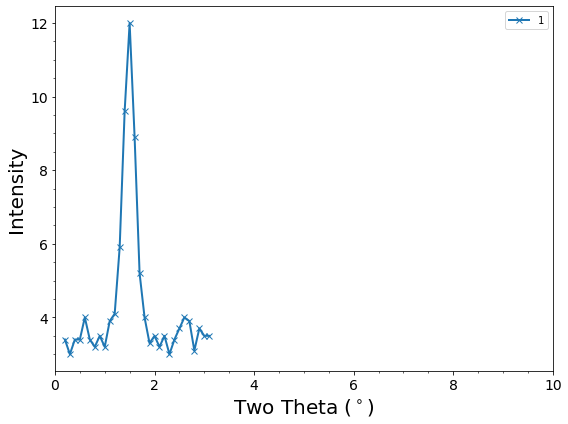

Diffraction pattern successfully loaded from file.


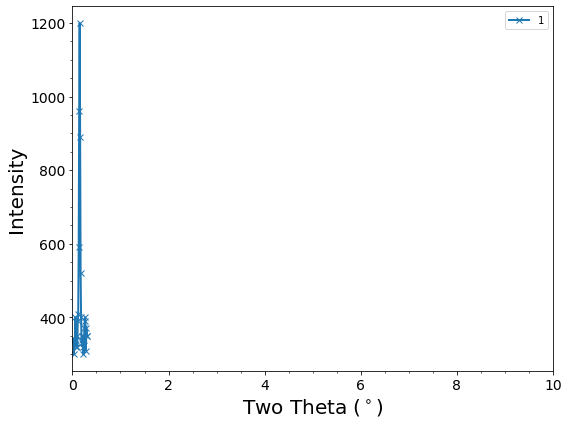

Diffraction pattern successfully loaded from file.


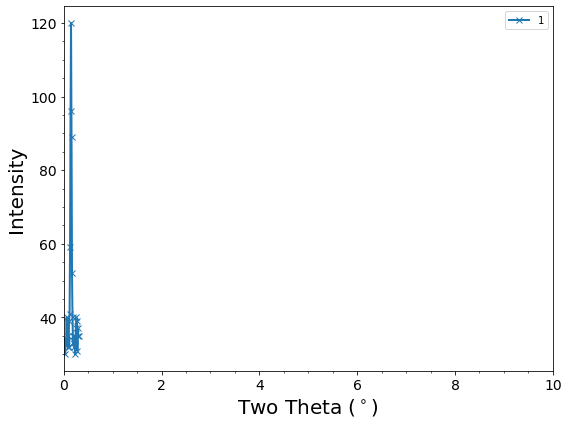

Diffraction pattern successfully loaded from file.


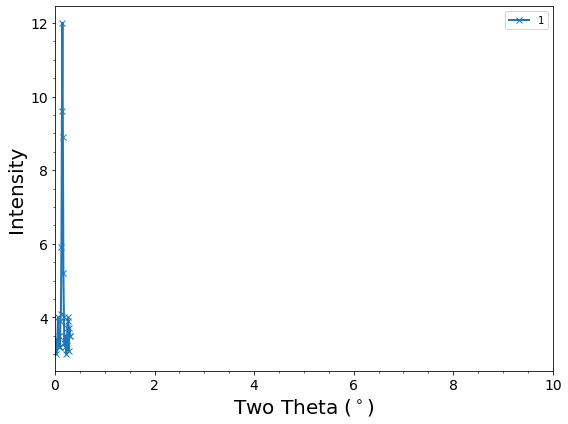

Diffraction pattern successfully loaded from file.


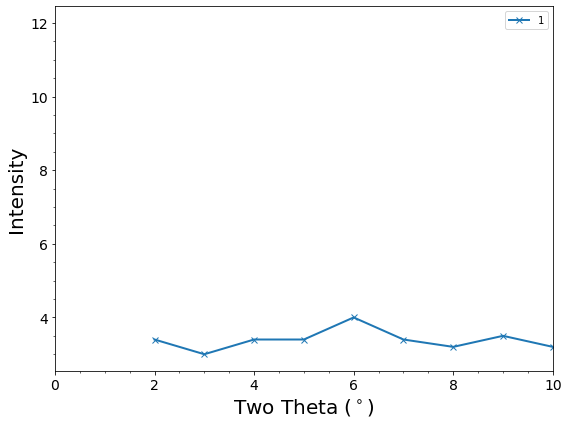

In [3]:
for file_path in test_files:
    spectral_data = spectrum_fitting.FitSpectrum(file_path, 90)
    spectral_data.plot(1, show_points=True)